Palavras Chave:

Aula 1 - PANDAS

Aula 2 - PRINT

Aula 3 - MATPLOTLIB

-------------------------------------------------------------------------------

Aula 1:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
df.describe()

#Podesmos entender de forma mais aaprofundada as estastíticas
#dos dados;

#Sem especificar nada ele pega só os dados numericos;
#Ele pega só os dados numéricos e nos mostras estatisticas descritivas;

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
df.shape

#Quando é um atributo não colocamos parenteses;
#Quando é uma função colocamos parenteses;

#Shape nos mostra a dimensao dos dados;
#133349 Linhas e 11 Colunas;

(133349, 11)

In [7]:
linhas = df.shape[0]
colunas =  df.shape[1]

print(f'Linhas: {linhas}\nColunas: {colunas}')

Linhas: 133349
Colunas: 11


In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
#Renomeando as colunas;

renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

df.rename(columns=renomear_colunas, inplace=True)
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [10]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [11]:
# Vamos analisar a quantidade trabalhadores em cada nivel de experiencia;

df['senioridade'].value_counts() #Como é um metodo, usamos ();


#SE senior;
#MI medio/pleno;
#EN junior;
#EX executivo/liderança;


senioridade
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

In [12]:
# Agora vamos analisar a quantidade de trbalhadores para cada tipo de contrato;

df['contrato'].value_counts()

#FT full time (horario integral);
#CT contrato temporario;
#PT meio periodo;
#FL free lancer;

contrato
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

In [13]:
df['remoto'].value_counts()

#0 presenciais;
#100 remoto;
#50 hibrido;

remoto
0      105312
100     27718
50        319
Name: count, dtype: int64

In [14]:
df['tamanho_empresa'].value_counts()

#S pequeno;
#M médio;
#L grande;

tamanho_empresa
M    129561
L      3574
S       214
Name: count, dtype: int64

In [15]:
# Mapear as categorias de senioridade para português
traducao_senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

df['senioridade'] = df['senioridade'].replace(traducao_senioridade)

# Verificar as contagens após a tradução
display(df['senioridade'].value_counts())

senioridade
Senior       77241
Pleno        40465
Junior       12443
Executivo     3200
Name: count, dtype: int64

In [16]:
#FT full time (horario integral);
#CT contrato temporario;
#PT meio periodo;
#FL free lancer;

traducao_contrato = {
    'FT': 'Integral',
    'CT': 'Temporário',
    'PT': 'Meio Periodo',
    'FL': 'Free Lancer'
}
df['contrato'] = df['contrato'].replace(traducao_contrato)

# Verificar as contagens após a tradução
display(df['contrato'].value_counts())

contrato
Integral        132563
Temporário         394
Meio Periodo       376
Free Lancer         16
Name: count, dtype: int64

In [17]:
traducao_tamanho_empresa = {
    'S': 'Pequeno',
    'M': 'Medio',
    'L': 'Grande'
}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(traducao_tamanho_empresa)

display(df['tamanho_empresa'].value_counts())

tamanho_empresa
Medio      129561
Grande       3574
Pequeno       214
Name: count, dtype: int64

In [18]:
traducao_remoto = {
    0: 'Presencial',
    100: 'Remoto',
    50: 'Hibrido'
}
df['remoto'] = df['remoto'].replace(traducao_remoto)

display(df['remoto'].value_counts())

remoto
Presencial    105312
Remoto         27718
Hibrido          319
Name: count, dtype: int64

In [19]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Medio
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Medio
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Medio
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Medio
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Medio


In [20]:
df.describe(include='object')

#Agora essa tabela conta as categorias, que não numericas;
#Unique = Ou seja, existem 4 categorias de senioridade e contrato;
#Top = diz a categoria mais frequente;
#Freq = Quantas vezes o valor do top aparece;

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Integral,Data Scientist,USD,US,Presencial,US,Medio
freq,77241,132563,17314,126140,119579,105312,119641,129561


Aula 2 - Limpeza de Dados

In [21]:
df.isnull()

#Onde não tem dado nulo, ele marca como False e quando tem marca como True;

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [22]:
df.isnull().sum()

ano                10
senioridade         0
contrato            0
cargo               0
salario             0
moeda               0
usd                 0
residencia          0
remoto              0
empresa             0
tamanho_empresa     0
dtype: int64

In [23]:
df['ano'].unique()
#Traz os valores unicos daquela conula em especifico

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [24]:
#Começamos da base inteira que é o df
#Podemos filtrar a base e filtrar por linhas que é o axis
#Traz todas as colunas que tem o valor nulo

df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Integral,Product Manager,184500,USD,184500,US,Presencial,US,Medio
59692,NaN,Pleno,Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Medio
59710,NaN,Junior,Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Medio
59759,NaN,Senior,Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Medio
59789,NaN,Senior,Integral,Engineer,112000,USD,112000,US,Presencial,US,Medio
131000,NaN,Senior,Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Medio
131006,NaN,Senior,Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Medio
133054,NaN,Junior,Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Integral,Data Scientist,130000,USD,130000,US,Hibrido,US,Grande


In [25]:
import numpy as np

In [26]:
#Dataframe criado pra teste

df_salarios = pd.DataFrame({
    'nomes': ['Sofia', 'Silvan', 'João', 'Pedro', 'Bianca'],
    'salários' : [1000, 500, 2000, np.nan, np.nan]
    })

#Calcula a media dos salarios e substitui null por esse valor
df_salarios['salario_media'] = df_salarios['salários'].fillna(df_salarios['salários'].mean().round(2))

''' Calcula a mediana e
 substitui por null'''

df_salarios['salario_mediana'] = df_salarios['salários'].fillna(df_salarios['salários'].median())
df_salarios

,nomes,salários,salario_media,salario_mediana
0,Sofia,1000.0,1000.00,1000.0
1,Silvan,500.0,500.00,500.0
2,João,2000.0,2000.00,2000.0
3,Pedro,NaN,1166.67,1000.0
4,Bianca,NaN,1166.67,1000.0


In [27]:
df_temperaturas = pd.DataFrame({
    'Dia' : ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo'],
    'Temperatura' : [30, 32, 31, np.nan, np.nan, 21, 24]
})

'''ffill é um foward fill que completa com o valor anterior da coluna'''

df_temperaturas['preenchido_ffill'] =  df_temperaturas['Temperatura'].ffill()
df_temperaturas

,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,32.0,32.0
2,Quarta,31.0,31.0
3,Quinta,NaN,31.0
4,Sexta,NaN,31.0
5,Sabado,21.0,21.0
6,Domingo,24.0,24.0


In [28]:
df_temperaturas = pd.DataFrame({
    'Dia' : ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo'],
    'Temperatura' : [30, 32, 31, np.nan, np.nan, 21, 24]
})

'''bfill é um back fill que completa com o valor posterior da coluna'''

df_temperaturas['preenchido_bfill'] =  df_temperaturas['Temperatura'].bfill()
df_temperaturas

,Dia,Temperatura,preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,32.0,32.0
2,Quarta,31.0,31.0
3,Quinta,NaN,21.0
4,Sexta,NaN,21.0
5,Sabado,21.0,21.0
6,Domingo,24.0,24.0


In [29]:
#O fillna substitui os valores null por algo que a gente determina

df_cidades = pd.DataFrame({
    'Nomes': ['Sofia', 'Silvan', 'João', 'Pedro', 'Bianca'],
    'Cidades' : ['Paulinia', 'Alfenas', 'Pouso Alegre', np.nan, 'Itajuba']
})

df_cidades['cidade_preenhida'] = df_cidades['Cidades'].fillna('Não informou')
df_cidades

,Nomes,Cidades,cidade_preenhida
0,Sofia,Paulinia,Paulinia
1,Silvan,Alfenas,Alfenas
2,João,Pouso Alegre,Pouso Alegre
3,Pedro,NaN,Não informou
4,Bianca,Itajuba,Itajuba


In [30]:
df_limpo = df.dropna()
df_limpo.isnull().sum()

ano                0
senioridade        0
contrato           0
cargo              0
salario            0
moeda              0
usd                0
residencia         0
remoto             0
empresa            0
tamanho_empresa    0
dtype: int64

In [31]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Medio
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Medio
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Medio
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Medio
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Medio


In [32]:
df_limpo.info()

#Como o ano aqui é do tipo float, ele não é um numero inteiro
#Assim o ano tem as casas decimais;

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [33]:
df_limpo = df_limpo.assign(ano=df_limpo['ano'].astype('int64'))
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


Aula 3 - Crie Gráficos e conte histórias com Dados

In [34]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Medio
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Medio
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Medio
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Medio
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Medio


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

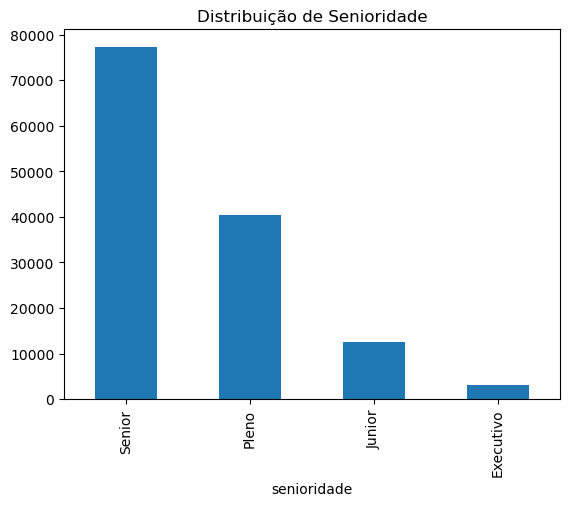

In [35]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de Senioridade')

In [36]:
#Bibliotecas para criação de dados mais complexos

import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

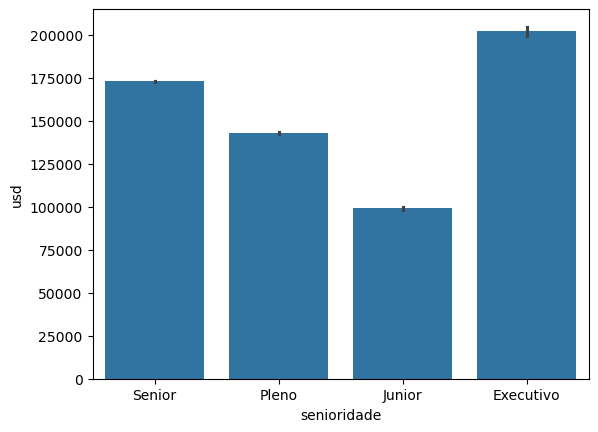

In [37]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

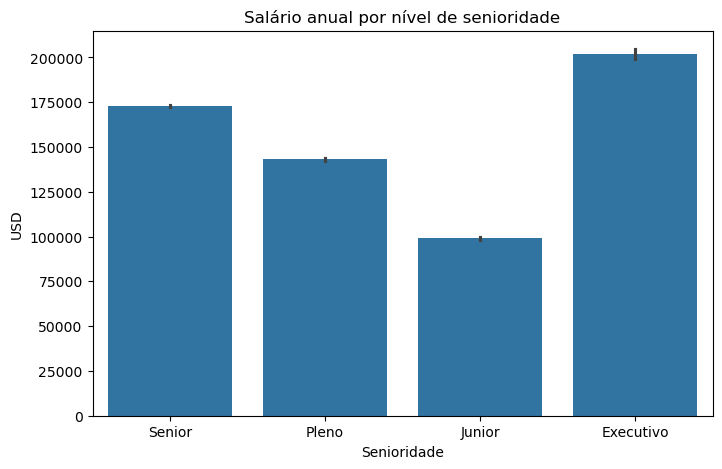

In [38]:
#Definimos o tamanho da figura;
plt.figure(figsize=(8, 5))

#Informações presentes no gráfico;
sns.barplot(data=df_limpo, x='senioridade', y='usd')

#Titulo do gráfico e nome dos eixos;
plt.title('Salário anual por nível de senioridade')
plt.xlabel('Senioridade')
plt.ylabel('USD')

#plt.show() Mostra apenas o gráfico;
plt.show()

In [39]:
'''No groupby, oque está entre parenteses é a coluna que
vamos utilizar pra agrupar os dados. Depois, oque é passado nos conchetes
é a coluna que vamos utilizar pra calcular uma estatistica.'''

'''O sort_values é usado pra ordenar valores e o ascending determina se será
ordenado em ordem crescente (True) ou descrescente (False).'''

df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

senioridade
Executivo    202027.667813
Senior       172850.838301
Pleno        143044.845979
Junior        99034.963267
Name: usd, dtype: float64

In [40]:
'''Quando usamos o .index ele faz uma lista contendo as linhas'''

ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index
ordem

Index(['Executivo', 'Senior', 'Pleno', 'Junior'], dtype='object', name='senioridade')

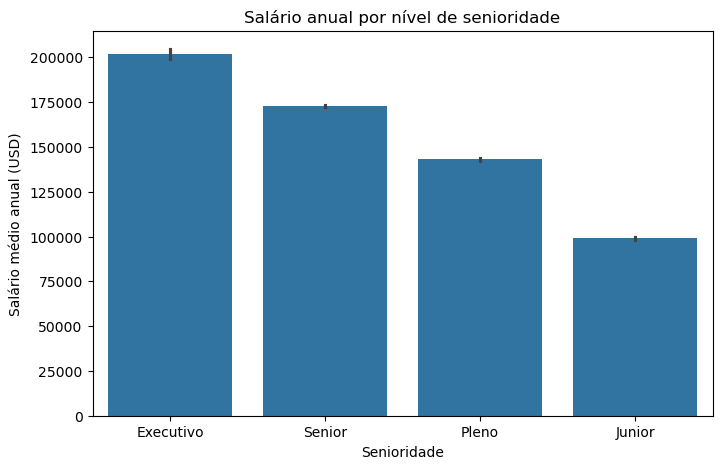

In [41]:
'''Neste gráfico, a organização dos dados feita previamente usando groupby
permite uma leitura mais clara dos dados.'''

#Definimos o tamanho da figura;
plt.figure(figsize=(8, 5))

#Informações presentes no gráfico;
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)

#Titulo do gráfico e nome dos eixos;
plt.title('Salário anual por nível de senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')

#plt.show() Mostra apenas o gráfico;
plt.show()

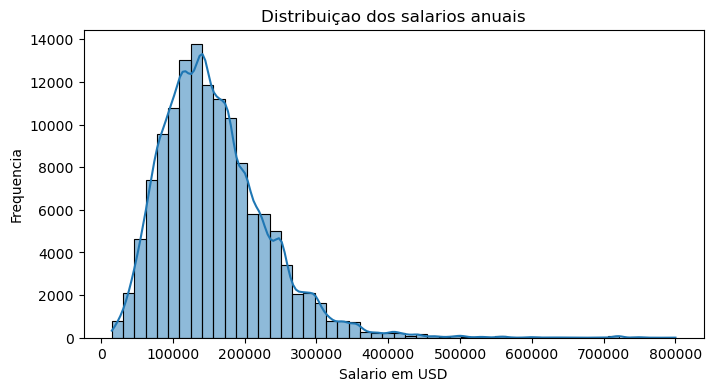

In [42]:
'''Os bins determinam que os salarios tem um intervalo de 50 em 50, quando
maior maior a granularidade das barras e se for menor acontece o oposto.
Esse gráfico nos permite entender a distribuição dos valores.
A distribuição desse gráfico nos mostra que o pico está entre os salarios
mais baixos.'''

plt.figure(figsize=(8, 4))

sns.histplot(df_limpo['usd'], bins = 50, kde=True)

#Titulo do gráfico e nome dos eixos;
plt.title('Distribuiçao dos salarios anuais')
plt.xlabel('Salario em USD')
plt.ylabel('Frequencia')

#plt.show() Mostra apenas o gráfico;
plt.show()

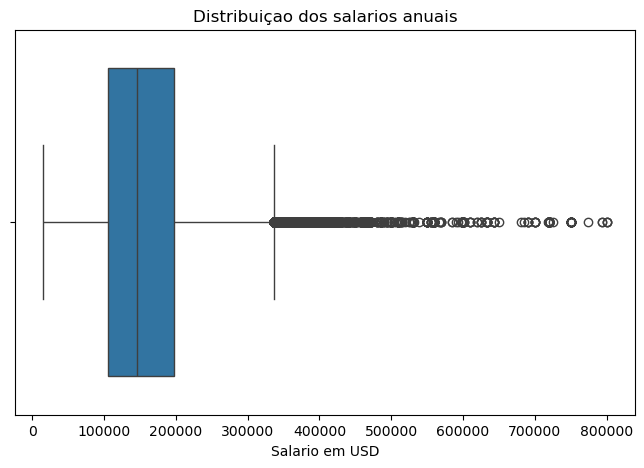

In [43]:
'''O gráfico de boxplot é mais técnico do que os anteriores.
Ele nos mostra as distribuiçoes a partir de uma caixa com extremidades
em ambos os lados mostrando os valores maximos e minimos. A linha do meio
representa a mediana. Os pontos são os outliers, dados discrepantes fora do
intervalo que estamos observando.'''

plt.figure(figsize=(8, 5))

sns.boxplot(x=df_limpo['usd'])

#Titulo do gráfico e nome dos eixos;
plt.title('Distribuiçao dos salarios anuais')
plt.xlabel('Salario em USD')

#plt.show() Mostra apenas o gráfico;
plt.show()

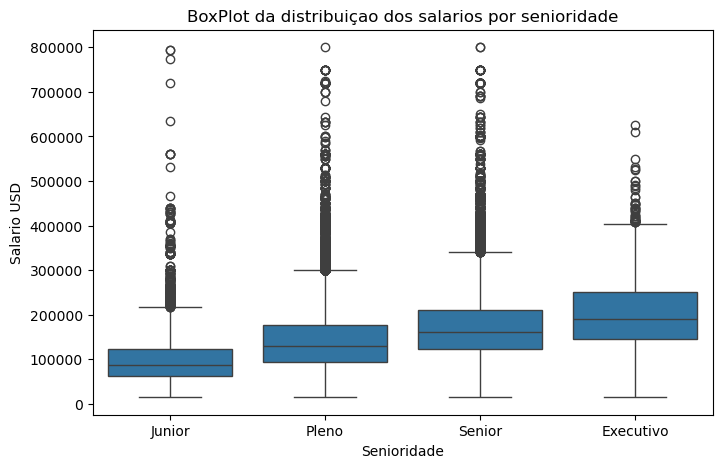

In [44]:
ondem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8, 5))

sns.boxplot(x='senioridade', y='usd', data= df_limpo,
 order=ondem_senioridade, )
#Titulo do gráfico e nome dos eixos;
plt.title('BoxPlot da distribuiçao dos salarios por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salario USD')

#plt.show() Mostra apenas o gráfico;
plt.show()

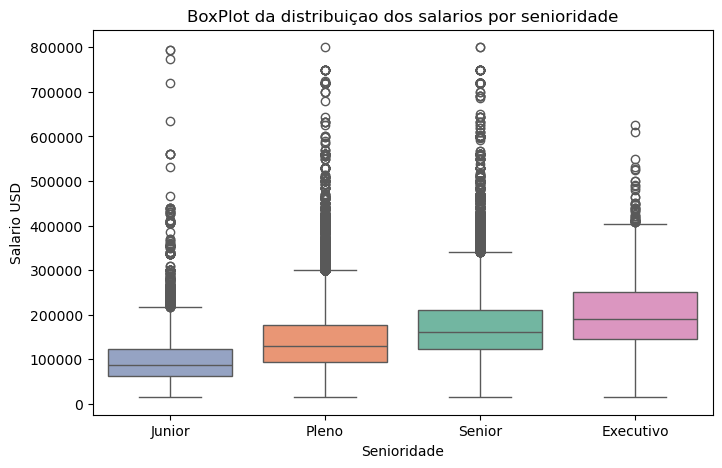

In [45]:
ondem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8, 5))


'''Cores nos gráficos nos permitem contar histórias com os dados.
Para adicionarmos cores nos boxplot, utilizamos o palette, que define um
conjunto de cores e o hue que pede pelas categorias dos dados para pintar
cada uma com uma cor.'''

sns.boxplot(x='senioridade', y='usd', data= df_limpo,
order=ondem_senioridade, palette= 'Set2', hue='senioridade')

#Titulo do gráfico e nome dos eixos;
plt.title('BoxPlot da distribuiçao dos salarios por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salario USD')

#plt.show() Mostra apenas o gráfico;
plt.show()

In [46]:
#Biblioteca utilizada para criação de gráficos interativos;

import plotly.express as px

In [47]:
# prompt: Crie um gráfico de média salarial por senioridade em barras usando o plotly

senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x='senioridade',
             y='usd',
             title='Média Salarial por Senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual (USD)'})

fig.show()

In [48]:
#Grafico de pizza;

remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names= 'tipo_trabalho',
             values= 'quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
             )

fig.update_traces(textinfo='percent+label')
fig.show()

In [49]:
#Fazer um gráfico de um cargo Data Cientist e fazer uma 
#visualizaçao de salario medio por país com gráfico interativo

In [50]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


In [51]:
import plotly.express as px

# Dicionário de tradução dos países
traducao_paises = {
    'SG': 'Singapore',
    'CH': 'Switzerland',
    'CA': 'Canada',
    'NZ': 'New Zealand',
    'AU': 'Australia',
    'DO': 'Dominican Republic',
    'KR': 'South Korea',
    'FR': 'France',
    'PT': 'Portugal',
    'SE': 'Sweden',
    'UA': 'Ukraine',
    'BR': 'Brazil',
    'UZ': 'Uzbekistan',
    'CL': 'Chile',
    'RU': 'Russia',
    'CY': 'Cyprus',
    'LV': 'Latvia',
    'AT': 'Austria',
    'NG': 'Nigeria',
    'TR': 'Turkey',
    'FI': 'Finland',
    'GR': 'Greece',
    'EE': 'Estonia',
    'SK': 'Slovakia',
    'RS': 'Serbia',
    'PK': 'Pakistan',
    'EC': 'Ecuador'
}

# Filtrar apenas cientistas de dados
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist'].copy()

# Traduzir nomes dos países com base no dicionário
df_ds['residencia'] = df_ds['residencia'].replace(traducao_paises)

# Calcular média salarial por país
media_ds_pais = df_ds.groupby('residencia')['usd'].mean().reset_index()

# Criar gráfico de mapa
fig = px.choropleth(
    media_ds_pais,
    locations='residencia',
    locationmode='country names',
    color='usd',
    color_continuous_scale='Viridis',
    title='Média Salarial de Cientistas de Dados por País (USD)',
)

fig.show()


In [52]:
df_desafio_aula3 = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_desafio_aula3.groupby('residencia')['usd'].mean().sort_values(ascending=True).reset_index()

fig = px.bar(media_ds_pais,
                x='usd',
                y='residencia',
                orientation='h',
                width=800,
                height=600,
                title='Média Salarial de Data Scientists por País',
                labels={'usd': 'Salário Medio (USD)', 'residencia': 'País'},
                color='usd')

fig.show()

Aula 04 - Construa um Dashboard interativo